# MLZoomcamp Homework 2

## Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading Dataset

In [22]:
df = pd.read_csv('/Users/Excellus/Downloads/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

### Preparing dataset

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

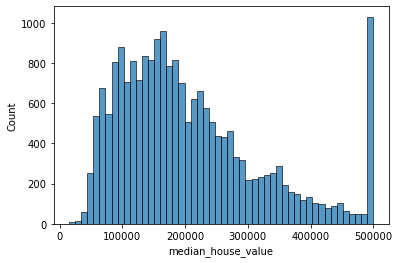

In [23]:
sns.histplot(df['median_house_value'], bins=50)

In [42]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [43]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
df_fil = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])].reset_index(drop=True)
df_fil

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

df_fill = df_fil[selected_columns]

In [19]:
df_fill.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [20]:
df_fill.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Splitting Dataset

In [24]:
np.random.seed(42)

In [25]:
n = len(df_fill)
idk = np.arange(n)

In [26]:
np.random.shuffle(idk)

In [30]:
n_test = int(0.2 * n)
n_val = int(0.2 * n)
n_train = n - n_test - n_val

n_test,n_val,n_train,n

(3137, 3137, 9413, 15687)

In [35]:
df_train = df_fill.iloc[idk[:n_train]]
df_test = df_fill.iloc[idk[n_train:n_train+n_test]]
df_val = df_fill.iloc[idk[n_train+n_test:]]

In [38]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [44]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [45]:
house_price_logs = np.log1p(df['median_house_value'])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

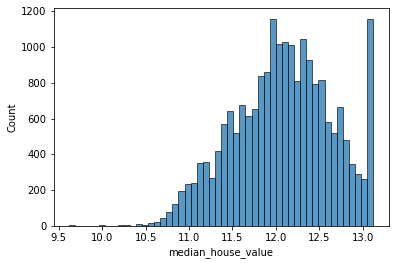

In [46]:
sns.histplot(house_price_logs, bins=50)

## The Model

#### Using Normal Equation Method

In [52]:
base = ['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income']

In [54]:
def prepare_o (df):
    y = np.log1p(df['median_house_value'].values)
    df = df[base]
    df = df.fillna(0).values
    return df, y

In [55]:
def prepare_m (df):
    y = np.log1p(df['median_house_value'].values)
    df = df[base]
    df = df.fillna(df.mean()).values
    return df, y

In [49]:
def train_linreg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [60]:
trainX_0, yX_0 = prepare_o(df_train)
w0, w = train_linreg(trainX_0, yX_0)

yPredX0 = w0 + trainX_0.dot(w)
score = rmse(yX_0, yPredX0)
score

0.34027197158295336

In [56]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error **2
    mse = se.mean()
    return np.sqrt(mse)

In [61]:
trainX_m, yX_m = prepare_m(df_train)
w0, w = train_linreg(trainX_m, yX_m)

yPredXm = w0 + trainX_m.dot(w)
score = rmse(yX_m, yPredXm)
score

0.34003008222642606

In [62]:
X_val0,yval_0 = prepare_o(df_val)
ypred0 = w0 + X_val0.dot(w)
score = rmse(yval_0, ypred0)
score

0.33060685481572855

In [63]:
X_valm,yval_m = prepare_m(df_val)
ypredm = w0 + X_valm.dot(w)
score = rmse(yval_m, ypredm)
score

0.33015685100551045

## Regularization

In [64]:
def train_lin_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [78]:
regs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
scored = {}


for r in regs:
    trainX, yX = prepare_o(df_train)
    w0, w = train_lin_reg(trainX, yX, r=r)
    
    X_valm,yval_m = prepare_m(df_val)
    ypredm = w0 + X_valm.dot(w)
    score = rmse(yval_m, ypredm)
    scored[r] = round(score,2)
    print(score)
    
print(scored)

0.33031909907066037
0.3303190993309203
0.33031912555038584
0.3303193943835709
0.3303249785163188
0.3305764528882637
0.33395254416559816
0.3368322447488907
0.3374227452632206
{0: 0.33, 1e-06: 0.33, 0.0001: 0.33, 0.001: 0.33, 0.01: 0.33, 0.1: 0.33, 1: 0.33, 5: 0.34, 10: 0.34}


### Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

In [81]:
rmselist = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(42)
    np.random.shuffle(idk)
    df_train = df_fill.iloc[idk[:n_train]]
    df_test = df_fill.iloc[idk[n_train:n_train+n_test]]
    df_val = df_fill.iloc[idk[n_train+n_test:]]
    
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    
    trainX_0, yX_0 = prepare_o(df_train)
    w0, w = train_linreg(trainX_0, yX_0)
    
    X_val0,yval_0 = prepare_o(df_val)
    ypred0 = w0 + X_val0.dot(w)
    score = rmse(yval_0, ypred0)
    rmselist.append(score)
print(rmselist)
std = np.std(rmselist)
std = round(std, 3)
std

[0.33798769020634806, 0.3506879630299998, 0.3421373114968278, 0.3397965416769395, 0.3483110890557675, 0.33589211561825727, 0.3362536385259258, 0.32610123299490046, 0.3332708559983033, 0.33235680376966864]


0.007

In [83]:
#rmse on test dataset
np.random.seed(9)
np.random.shuffle(idk)
df_train = df_fill.iloc[idk[:n_train]]
df_test = df_fill.iloc[idk[n_train:n_train+n_test]]
df_val = df_fill.iloc[idk[n_train+n_test:]]
    
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

merged_df = pd.concat([df_train, df_val], axis=0)

trainX_m, yX_m = prepare_o(merged_df)

w0, w = train_lin_reg(trainX_m, yX_m, r=0.001)
    
X_test0,ytest_0 = prepare_o(df_test)
ypred0 = w0 + X_test0.dot(w)
score = rmse(ytest_0, ypred0)

score

0.33821226472098476